# 資料分析

In [1]:
#粗略查看資料型態
#因方便辨識有重新命名檔案(不然都是u) 所以才會有u.data.data這種鬼東西
#因方便辨識有重新命名檔案(不然都是u) 所以才會有u.data.data這種鬼東西
#因方便辨識有重新命名檔案(不然都是u) 所以才會有u.data.data這種鬼東西


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#u.data 評分資料
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("u.data.data", sep = '\t', header = None, names=rating_header)
print(rating.head())
print('\n')
rating.info()
print("__________________________________________________________________________\n")

#u.item 電影資料
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv('u.item.item', sep = '|', header = None, encoding = 'latin1', names = movie_header)
print(movies.head())
print('\n')
movies.info()
print("__________________________________________________________________________\n")

#u.user 使用者資料
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
user = pd.read_csv('u.user.user', sep = '|', header = None, encoding = 'latin1', names = user_header)
print(user.head())
print('\n')
user.info()
print("__________________________________________________________________________\n")

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
__________________________________________________________________________

   item_id              title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        3  Four Rooms (1995)  01-Jan-1995                 NaN   
3        4  Get Shorty (1995)  01-Jan-1995 

### 資料組合並將字串轉數值

In [2]:
#資料合併
#不確定要不要用清理後的rating 暫用原始rating
all_data = pd.merge(pd.merge(user,rating), movies)

# 移除字串和未使用欄位
all_data = all_data.drop(['title', 'video_release_date', 'release_date', 'IMDb_URL', 'unknown', 'timestamp', "zip_code"],axis=1)

#職業
occupation = pd.read_csv("u.occupation.occupation", header = None)
#有幾種職業
occupation_list = occupation.values
all_data["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)

all_data["gender"].replace(['F', 'M'],[0, 1], inplace=True)

all_data["rating"] = all_data["rating"].astype(int)

#合併後的前十筆
all_data.head(10)

,user_id,age,gender,occupation,item_id,rating,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,1,19,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,47,1,3,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18,35,0,13,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58,27,1,14,61,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59,49,1,3,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,60,50,1,7,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,76,20,1,18,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,94,26,1,18,61,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,144,53,1,14,61,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,154,25,1,18,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 分析出 pearson 關聯值，並絕對值，找到平均值以上的關聯欄位 

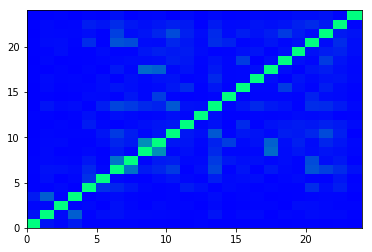

In [3]:
# 資料關聯性
all_corr = all_data.corr().abs()

plt.pcolormesh(all_corr, cmap = 'winter')

plt.show()

In [4]:
all_corr

,user_id,age,gender,occupation,item_id,rating,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
user_id,1.000000,0.073599,0.027605,0.103684,0.010377,0.009371,0.014076,0.013032,0.005402,0.006757,...,0.001055,0.001824,0.007408,0.005144,0.004022,0.006438,0.007302,0.001300,0.006479,0.000477
age,0.073599,1.000000,0.033358,0.369476,0.012612,0.054460,0.063920,0.034052,0.034667,0.028196,...,0.010104,0.032774,0.038826,0.001189,0.027750,0.017585,0.039955,0.033085,0.035203,0.009527
gender,0.027605,0.033358,1.000000,0.017354,0.034575,0.000862,0.059997,0.026500,0.008230,0.033961,...,0.002970,0.010705,0.017493,0.017586,0.003700,0.049035,0.044447,0.030092,0.018032,0.018011
occupation,0.103684,0.369476,0.017354,1.000000,0.003069,0.027199,0.040854,0.016239,0.011662,0.011975,...,0.005959,0.017058,0.020627,0.001650,0.007406,0.010487,0.017360,0.025416,0.021497,0.002614
item_id,0.010377,0.012612,0.034575,0.003069,1.000000,0.189124,0.147563,0.084092,0.026971,0.010476,...,0.037119,0.022377,0.012053,0.022761,0.010255,0.009429,0.169519,0.048885,0.111135,0.017703
rating,0.009371,0.054460,0.000862,0.027199,0.189124,1.000000,0.025847,0.009342,0.008047,0.043644,...,0.032721,0.046206,0.050413,0.001716,0.022630,0.040107,0.010471,0.009802,0.081815,0.010184
Action,0.014076,0.063920,0.059997,0.040854,0.147563,0.025847,1.000000,0.451525,0.099022,0.144838,...,0.013883,0.077876,0.007718,0.091214,0.032807,0.018748,0.323875,0.249647,0.166665,0.063467
Adventure,0.013032,0.034052,0.026500,0.016239,0.084092,0.009342,0.451525,1.000000,0.024734,0.100567,...,0.087760,0.053030,0.058654,0.024798,0.043676,0.018516,0.294811,0.049453,0.087115,0.010551
Animation,0.005402,0.034667,0.008230,0.011662,0.026971,0.008047,0.099022,0.024734,1.000000,0.555386,...,0.026133,0.025682,0.028374,0.417647,0.045498,0.085441,0.044729,0.077146,0.056401,0.026579
Children's,0.006757,0.028196,0.033961,0.011975,0.010476,0.043644,0.144838,0.100567,0.555386,1.000000,...,0.238081,0.036940,0.065918,0.381293,0.055021,0.119323,0.042213,0.144181,0.085342,0.031054


In [5]:
label_name = 'rating'

all_corr_higher_mean = all_corr > all_corr.median()

corr_list = all_corr_higher_mean[label_name]

corr_list = corr_list[corr_list == True].index.tolist()

higher_mean_corr_list = []

for higher_mean_name in corr_list:
    higher_mean_corr_list.append({'name': higher_mean_name ,'value':all_corr[label_name][higher_mean_name]})

higher_mean_corr_list.sort(key=lambda k: (k.get('value', 0)), reverse = True)
higher_mean_corr_list = higher_mean_corr_list[1:]

higher_mean_corr_list

[{'name': 'item_id', 'value': 0.18912418904006953},
 {'name': 'Drama', 'value': 0.11400596983253344},
 {'name': 'War', 'value': 0.08181472356808857},
 {'name': 'Comedy', 'value': 0.07865348880314632},
 {'name': 'age', 'value': 0.054460397809777496},
 {'name': 'Horror', 'value': 0.050412631571332724},
 {'name': 'Film-Noir', 'value': 0.04620596871837689},
 {'name': "Children's", 'value': 0.043644124683997185},
 {'name': 'Romance', 'value': 0.04010739221965553},
 {'name': 'Fantasy', 'value': 0.03272086643665702},
 {'name': 'occupation', 'value': 0.027198794534622615}]

### 分析出 spearman 關聯值，並絕對值，找到平均值以上的關聯欄位 

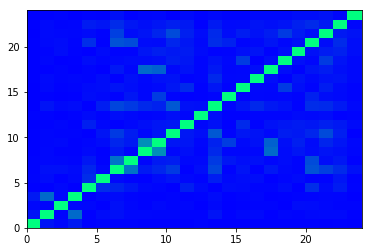

In [6]:
# kendall / spearman
all_corr = all_data.corr(method='spearman').abs()

plt.pcolormesh(all_corr, cmap = 'winter')

plt.show()

In [7]:
label_name = 'rating'

all_corr_higher_mean = all_corr > all_corr.median()

corr_list = all_corr_higher_mean[label_name]

corr_list = corr_list[corr_list == True].index.tolist()

higher_mean_corr_list = []

for higher_mean_name in corr_list:
    higher_mean_corr_list.append({'name': higher_mean_name ,'value':all_corr[label_name][higher_mean_name]})

higher_mean_corr_list.sort(key=lambda k: (k.get('value', 0)), reverse = True)
higher_mean_corr_list = higher_mean_corr_list[1:]

higher_mean_corr_list

[{'name': 'item_id', 'value': 0.17325518962653488},
 {'name': 'Drama', 'value': 0.11419900292973414},
 {'name': 'War', 'value': 0.08530569198452304},
 {'name': 'Comedy', 'value': 0.07889733979654565},
 {'name': 'Horror', 'value': 0.04801027264972247},
 {'name': 'Film-Noir', 'value': 0.04701146021984468},
 {'name': 'age', 'value': 0.04498456591416664},
 {'name': "Children's", 'value': 0.04431236605488729},
 {'name': 'Romance', 'value': 0.03908374489282732},
 {'name': 'occupation', 'value': 0.03432799502256051},
 {'name': 'Fantasy', 'value': 0.03416610591612418}]